In [45]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

In [46]:
data = pd.read_csv("METABRIC_RNA_Mutation.csv")

C:\Users\shasa\AppData\Local\Temp\ipykernel_18192\371503695.py:1: DtypeWarning: Columns (678,688,690,692) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("METABRIC_RNA_Mutation.csv")


In [47]:
data.dropna(subset = ['tumor_stage'],inplace=True)

In [48]:
data.shape

(1403, 693)

In [49]:
data.dropna(subset = ['cancer_type_detailed'],inplace=True)

In [50]:
data.shape

(1394, 693)

In [51]:
data.drop(["type_of_breast_surgery","cancer_type","patient_id","cellularity","chemotherapy","cohort","radio_therapy","overall_survival","hormone_therapy","integrative_cluster"],inplace=True,axis=1)

In [52]:
for column in ['cancer_type_detailed', 'pam50_+_claudin-low_subtype', 'er_status', 'neoplasm_histologic_grade','her2_status_measured_by_snp6', 
               'her2_status','tumor_other_histologic_subtype','inferred_menopausal_state','primary_tumor_laterality','pr_status', '3-gene_classifier_subtype']:
    label_encoder = LabelEncoder()
    data[column] = label_encoder.fit_transform(data[column])

In [53]:
#meta

In [54]:
meta = ["age_at_diagnosis","cancer_type_detailed","pam50_+_claudin-low_subtype","er_status","neoplasm_histologic_grade","her2_status_measured_by_snp6","her2_status","tumor_other_histologic_subtype","inferred_menopausal_state","primary_tumor_laterality","lymph_nodes_examined_positive","mutation_count","nottingham_prognostic_index","pr_status","3-gene_classifier_subtype","tumor_size","tumor_stage"]

In [55]:
data1 = data[meta]

In [56]:
data1.columns

Index(['age_at_diagnosis', 'cancer_type_detailed',
       'pam50_+_claudin-low_subtype', 'er_status', 'neoplasm_histologic_grade',
       'her2_status_measured_by_snp6', 'her2_status',
       'tumor_other_histologic_subtype', 'inferred_menopausal_state',
       'primary_tumor_laterality', 'lymph_nodes_examined_positive',
       'mutation_count', 'nottingham_prognostic_index', 'pr_status',
       '3-gene_classifier_subtype', 'tumor_size', 'tumor_stage'],
      dtype='object')

In [57]:
data1.corr()["tumor_stage"]

age_at_diagnosis                  0.084545
cancer_type_detailed             -0.044766
pam50_+_claudin-low_subtype      -0.028982
er_status                        -0.101625
neoplasm_histologic_grade         0.138582
her2_status_measured_by_snp6     -0.037406
her2_status                       0.081604
tumor_other_histologic_subtype   -0.084090
inferred_menopausal_state        -0.019307
primary_tumor_laterality          0.021687
lymph_nodes_examined_positive     0.446947
mutation_count                   -0.020601
nottingham_prognostic_index       0.545475
pr_status                        -0.118508
3-gene_classifier_subtype         0.049333
tumor_size                        0.508218
tumor_stage                       1.000000
Name: tumor_stage, dtype: float64

In [58]:
data1.corr()["cancer_type_detailed"]

age_at_diagnosis                  0.055783
cancer_type_detailed              1.000000
pam50_+_claudin-low_subtype       0.049750
er_status                         0.160969
neoplasm_histologic_grade        -0.175152
her2_status_measured_by_snp6      0.152277
her2_status                      -0.126998
tumor_other_histologic_subtype    0.755297
inferred_menopausal_state        -0.074707
primary_tumor_laterality         -0.003346
lymph_nodes_examined_positive    -0.028714
mutation_count                    0.017161
nottingham_prognostic_index      -0.157103
pr_status                         0.128972
3-gene_classifier_subtype        -0.116409
tumor_size                       -0.011044
tumor_stage                      -0.044766
Name: cancer_type_detailed, dtype: float64

In [59]:
#tumor stage based on diagnoistic data

In [60]:
X = data1.drop('tumor_stage', axis=1)
y = data1['tumor_stage']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=88)

In [61]:
xgb = XGBClassifier(n_estimators=100,enable_categorical=True)
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=True, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [62]:
preds = xgb.predict(X_test)
acc_xgb = (preds == y_test).sum().astype(float) / len(preds)*100

print("XGBoost's prediction accuracy is: %3.2f" % (acc_xgb))

XGBoost's prediction accuracy is: 85.92


In [63]:
#cancer type prediction based on diagnoistic data

In [64]:
data11 = data1.drop('tumor_stage', axis=1)
X = data11.drop('cancer_type_detailed', axis=1)
y = data11['cancer_type_detailed']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=88)

In [65]:
xgb = XGBClassifier(n_estimators=100,enable_categorical=True)
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=True, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [66]:
preds = xgb.predict(X_test)
acc_xgb = (preds == y_test).sum().astype(float) / len(preds)*100

print("XGBoost's prediction accuracy is: %3.2f" % (acc_xgb))

XGBoost's prediction accuracy is: 99.76


In [67]:
#rna

In [68]:
data2 = data.iloc[:,21:510]

In [69]:
data2["tumor_stage"] = data["tumor_stage"]

In [70]:
data2

,brca1,brca2,palb2,pten,tp53,atm,cdh1,chek2,nbn,nf1,...,srd5a2,srd5a3,st7,star,tnk2,tulp4,ugt2b15,ugt2b17,ugt2b7,tumor_stage
0,-1.3990,-0.5738,-1.6217,1.4524,0.3504,1.1517,0.0348,0.1266,-0.8361,-0.8578,...,-0.0194,-1.6345,-0.2142,-0.5698,-1.1741,-1.4779,-0.5954,-0.8847,-0.3354,2.0
1,-1.3800,0.2777,-1.2154,0.5296,-0.0136,-0.2659,1.3594,0.7961,0.5419,-2.6059,...,0.4534,0.4068,0.7634,0.0231,0.9121,-0.9538,-0.2264,0.5398,-0.8920,1.0
2,0.0670,-0.8426,0.2114,-0.3326,0.5141,-0.0803,1.1398,0.4187,-0.4030,-1.1305,...,0.0668,0.8344,1.7227,0.4024,-3.7172,-1.5538,1.3701,-0.1078,0.3655,2.0
3,0.6744,-0.5428,-1.6592,0.6369,1.6708,-0.8880,1.2491,-1.1889,-0.4174,-0.6165,...,-0.7078,0.8228,0.6819,-0.1948,-2.3286,-0.9924,-0.3154,0.2320,-0.4828,2.0
4,1.2932,-0.9039,-0.7219,0.2168,0.3484,0.3897,0.9131,0.9356,0.7675,-0.2940,...,-0.3544,-1.0150,2.2961,0.1817,-0.1572,0.0427,5.0048,3.8476,1.3223,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1619,-0.4151,-0.2158,-0.2229,0.6256,0.1746,2.0361,0.1095,0.1703,0.4698,0.6346,...,-2.2898,0.7959,0.5885,-0.5030,-0.2028,0.1612,-0.7089,-0.9014,-0.6310,1.0
1621,0.3941,-0.9708,-0.5213,0.0413,0.6041,0.4105,-0.0416,0.1824,0.5114,0.4438,...,-1.1495,-1.2216,-0.7379,1.8240,0.2230,-0.3529,-0.3898,0.3046,-0.6861,1.0
1623,-0.5892,0.0127,0.5310,0.6685,0.7391,-0.0885,-0.5507,0.2998,-0.1456,0.1503,...,0.0102,-0.2031,-0.0867,-1.5902,0.4162,-0.1676,-0.0993,-0.5916,-0.8837,2.0
1628,-1.6019,-0.7743,1.5850,-4.1199,-1.5018,0.6513,0.0937,1.2580,-0.2282,-0.5178,...,0.4776,-0.8773,0.1320,-1.8647,-0.2622,-0.2575,-0.4570,-0.2008,-0.8148,2.0


In [73]:
X = data2.drop('tumor_stage', axis=1)
y = data2['tumor_stage']

In [ ]:
acc_score = []
seeds = range(0,101,)

for seed in seeds:
    print(seed)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed)
    xgb =  XGBClassifier(n_estimators=100,enable_categorical=True)
    xgb.fit(X_train, y_train)
    preds = xgb.predict(X_test)
    acc_xgb = (preds == y_test).sum().astype(float) / len(preds)*100
    acc_score.append(acc_xgb)

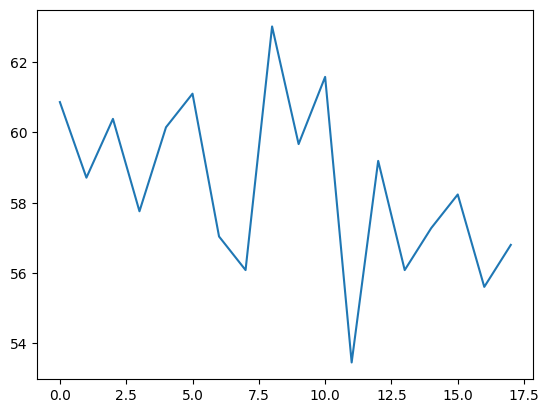

In [85]:
plt.plot(acc_score)

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=88)
xgb = XGBClassifier(n_estimators=100,enable_categorical=True)
xgb.fit(X_train, y_train)
preds = xgb.predict(X_test)
acc_xgb = (preds == y_test).sum().astype(float) / len(preds)*100
print("XGBoost's prediction accuracy is: %3.2f" % (acc_xgb))

XGBoost's prediction accuracy is: 63.01


(0.0, 0.2)

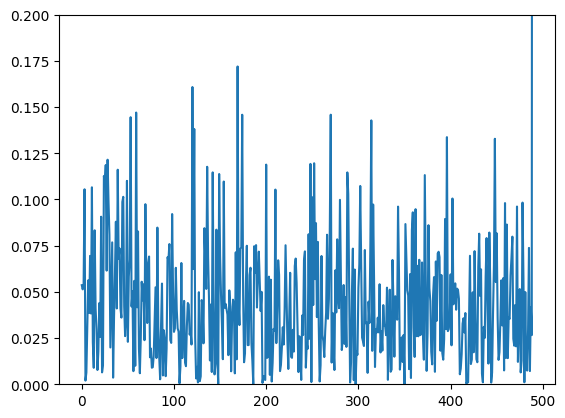

In [89]:
plt.plot(abs(data2.corr()["tumor_stage"].values))
plt.ylim(0,0.2)

In [92]:
x = data2.corr()["tumor_stage"]
gene = x[abs(x) > 0.1].index.tolist()

In [93]:
gene

['pten',
 'bard1',
 'ccnb1',
 'cdk1',
 'ccne1',
 'cdc25a',
 'e2f2',
 'e2f8',
 'stat1',
 'stat5b',
 'aph1b',
 'aurka',
 'bcl2',
 'casp10',
 'chek1',
 'diras3',
 'eif4ebp1',
 'gsk3b',
 'igf1r',
 'mapk8',
 'mmp15',
 'rps6ka2',
 'rps6kb2',
 'slc19a1',
 'tsc1',
 'runx1',
 'tbx3',
 'mapt',
 'ahnak',
 'ncoa3',
 'rpgr',
 'sf3b1',
 'hes6',
 'tumor_stage']

In [94]:
data3 = data2[gene]

In [95]:
data3.shape

(1394, 34)

In [96]:
X = data3.drop('tumor_stage', axis=1)
y = data3['tumor_stage']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=88)

In [97]:
xgb = XGBClassifier(n_estimators=100,enable_categorical=True)
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=True, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [98]:
preds = xgb.predict(X_test)
acc_xgb = (preds == y_test).sum().astype(float) / len(preds)*100

print("XGBoost's prediction accuracy is: %3.2f" % (acc_xgb))

XGBoost's prediction accuracy is: 59.67


In [42]:
y_train.name = "tumor_stage"

In [56]:
#with pca

In [30]:
from sklearn.decomposition import PCA

In [46]:
pca = PCA(n_components=0.5,random_state=42)
r = pca.fit_transform(X = X_train.values)
X_train_pca = pd.DataFrame(pca.transform(X_train.values))

In [49]:
X_train.shape

(982, 172)

In [50]:
X_train_pca.shape

(982, 14)

In [51]:
xgb = XGBClassifier(n_estimators=100,enable_categorical=True)
xgb.fit(X_train_pca, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=True, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [53]:
X_test_pca = pca.transform(X_test)

C:\Users\shasa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


In [55]:
preds = xgb.predict(X_test_pca)
acc_xgb = (preds == y_test).sum().astype(float) / len(preds)*100

print("XGBoost's prediction accuracy is: %3.2f" % (acc_xgb))

XGBoost's prediction accuracy is: 54.87


In [16]:
mut_col = []
for i in data.columns:
    if "_mut" in i:
        mut_col.append(i)

In [17]:
col = []
for i in data.columns:
    if "_mut" not in i:
        col.append(i)

In [8]:
mutation_data = data[mut_col]

In [12]:
mutation_data

,pik3ca_mut,tp53_mut,muc16_mut,ahnak2_mut,kmt2c_mut,syne1_mut,gata3_mut,map3k1_mut,ahnak_mut,dnah11_mut,...,mtap_mut,ppp2cb_mut,smarcd1_mut,nras_mut,ndfip1_mut,hras_mut,prps2_mut,smarcb1_mut,stmn2_mut,siah1_mut
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,H178P,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,H1047R,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,E542K,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,S241F,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1899,E542K,0,0,0,0,0,0,R1482*,0,0,...,0,0,0,0,0,0,0,0,0,0
1900,0,M237I,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1901,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1902,0,0,0,V3102M,0,0,S404Kfs*104 L94Pfs*117,0,R5779C,P232L,...,0,0,0,0,0,0,0,0,0,0


In [14]:
for i in mutation_data.columns:
    print(i)
    print(mutation_data[i].unique())

pik3ca_mut
['0' 'H1047R' 'E542K' 'Q546H G1049R' 'E545K' 'N345K E81K' 'H1047L E726K'
 'H1047L' 'E545Q' 'N345K' 'L452Kfs*4 E453Dfs*7' 'N345K N1044K'
 'E365K C420R' 'E545K H1047R' 'E542K E726K' 'E453_L455del' 'G451_D454del'
 'E110del' 'Q546K' 'H1047R E453K' 'R88Q' 'H1047R P104L' 'H1047R E726K'
 'M1043V' 'Q546P' 'N1068Kfs*5' 'H1047R R108H' 'K111E' 'H1047R G118D'
 'H1047R H1048R' 'E545G' 'E542K N345K' 'E545K G320A' 'E545K S509Y' 'E418K'
 'E545K G914R' 'H1047R L10_P17del' 'C420R' 'P449S' 'E545K E726K'
 'H1047R E81K' 'Q546R' 'H1047R D1029H H1048R' 'E545K M1043V' 'P449T'
 'V105del K148N' 'A1066Cfs*7' 'H1047R T727K' 'E545A' 'H1047R E80K' 'E726K'
 'H1047L E385K' 'H1047R K111E' 'E542K T727K' 'M1043I' 'H1047R P471L'
 'E726K P449_L452del' 'G118D' 'N345K M1043I' 'Y1021Hfs*9' 'P447_L455del'
 'Q546H' 'Q546R E453K' 'E542K Y1021H' 'R108del' 'M1043V E726K'
 'E545K D725N' 'H1047R E365K' '*1069Lfs*5' 'E453_G460delinsD' 'H1047Y'
 'E542K D1045N Q1064H' 'R88Q H1047R' 'H450_I459del' 'F909L' 'H1047L P449T'
 'G1

In [19]:
data2 = data[col]

In [20]:
data2

,patient_id,age_at_diagnosis,type_of_breast_surgery,cancer_type,cancer_type_detailed,cellularity,chemotherapy,pam50_+_claudin-low_subtype,cohort,er_status_measured_by_ihc,...,srd5a1,srd5a2,srd5a3,st7,star,tnk2,tulp4,ugt2b15,ugt2b17,ugt2b7
0,0,75.65,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,NaN,0,claudin-low,1.0,Positve,...,-1.1877,-0.0194,-1.6345,-0.2142,-0.5698,-1.1741,-1.4779,-0.5954,-0.8847,-0.3354
1,2,43.19,BREAST CONSERVING,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,LumA,1.0,Positve,...,-0.4412,0.4534,0.4068,0.7634,0.0231,0.9121,-0.9538,-0.2264,0.5398,-0.8920
2,5,48.87,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,1,LumB,1.0,Positve,...,-0.5381,0.0668,0.8344,1.7227,0.4024,-3.7172,-1.5538,1.3701,-0.1078,0.3655
3,6,47.68,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,1,LumB,1.0,Positve,...,-0.5630,-0.7078,0.8228,0.6819,-0.1948,-2.3286,-0.9924,-0.3154,0.2320,-0.4828
4,8,76.97,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,1,LumB,1.0,Positve,...,-0.5845,-0.3544,-1.0150,2.2961,0.1817,-0.1572,0.0427,5.0048,3.8476,1.3223
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1899,7295,43.10,BREAST CONSERVING,Breast Cancer,Breast Invasive Lobular Carcinoma,High,0,LumA,4.0,Positve,...,0.7859,1.5304,1.1196,0.8116,0.0958,-1.2644,-0.3566,-0.2615,-0.6371,-0.5540
1900,7296,42.88,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,LumB,4.0,Positve,...,-0.5294,-0.6610,-0.1610,0.2251,0.5127,-0.3412,-1.0703,-0.6950,0.0641,-0.8863
1901,7297,62.90,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,LumB,4.0,Positve,...,-0.1457,-0.5194,2.3968,0.5917,-0.8643,-1.3541,-1.8076,-0.1840,0.0967,-0.6264
1902,7298,61.16,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,Moderate,0,LumB,4.0,Positve,...,-0.6380,-1.5275,1.1070,0.2194,1.4317,-0.6985,-0.6046,-0.4915,-0.2847,-0.8041
